In [28]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline


In [29]:
df = pd.read_csv('https://raw.githubusercontent.com/dsrscientist/dataset1/master/abalone.csv')
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


# Explorative data analysis

In [30]:
df['Sex'] = df['Sex'].replace({"M":1,"F":0,"I":2}).astype(int)

In [31]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [32]:
df.Sex.unique()

array([1, 0, 2])

In [33]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   int32  
 1   Length          4177 non-null   float64
 2   Diameter        4177 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4177 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4177 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int32(1), int64(1)
memory usage: 277.5 KB


In [34]:
df.describe()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
count,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000,4177.000000
mean,1.008379,0.523992,0.407881,0.139516,0.828742,0.359367,0.180594,0.238831,9.933684
std,0.796410,0.120093,0.099240,0.041827,0.490389,0.221963,0.109614,0.139203,3.224169
min,0.000000,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,1.000000
25%,0.000000,0.450000,0.350000,0.115000,0.441500,0.186000,0.093500,0.130000,8.000000
50%,1.000000,0.545000,0.425000,0.140000,0.799500,0.336000,0.171000,0.234000,9.000000
75%,2.000000,0.615000,0.480000,0.165000,1.153000,0.502000,0.253000,0.329000,11.000000
max,2.000000,0.815000,0.650000,1.130000,2.825500,1.488000,0.760000,1.005000,29.000000


In [35]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [36]:
df.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.627574
Diameter          0.574660
Height            0.557467
Length            0.556720
Whole weight      0.540390
Viscera weight    0.503819
Shucked weight    0.420884
Sex              -0.401445
Name: Rings, dtype: float64

In [37]:
df.Rings.sort_values().sort_index()

0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64

In [44]:
df.Rings.unique

<bound method Series.unique of 0       15
1        7
2        9
3       10
4        7
        ..
4172    11
4173    10
4174     9
4175    10
4176    12
Name: Rings, Length: 4177, dtype: int64>

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\l

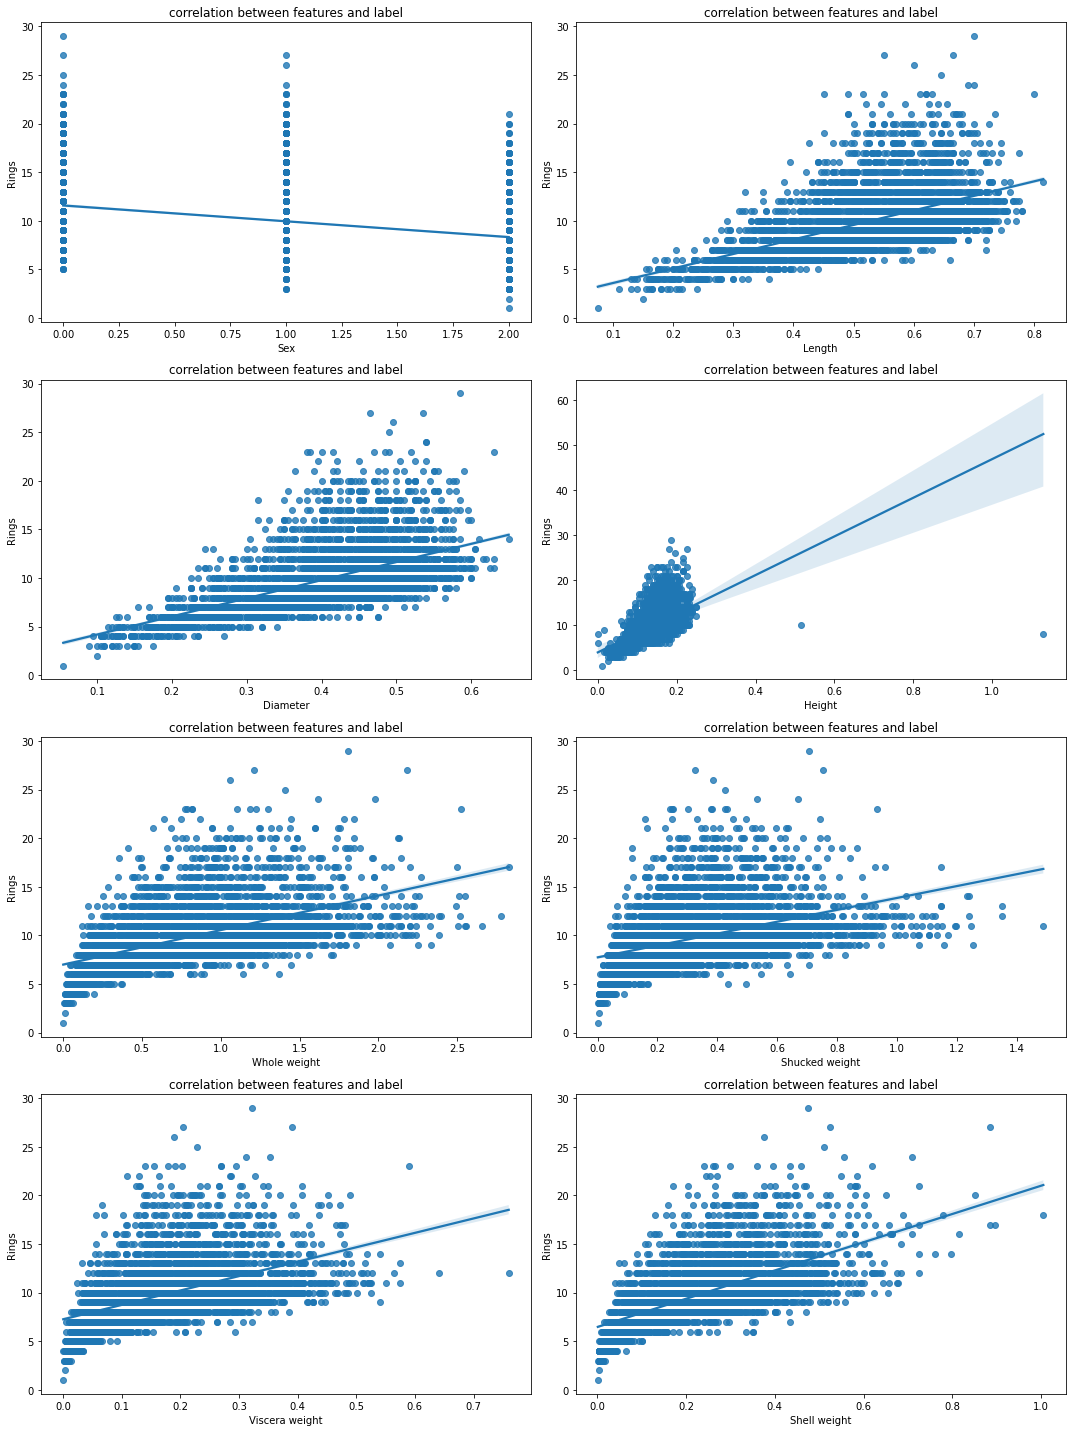

In [45]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in df:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.regplot(df[column],df['Rings'])
        plt.title('correlation between features and label')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\distributions.py:2619: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level 

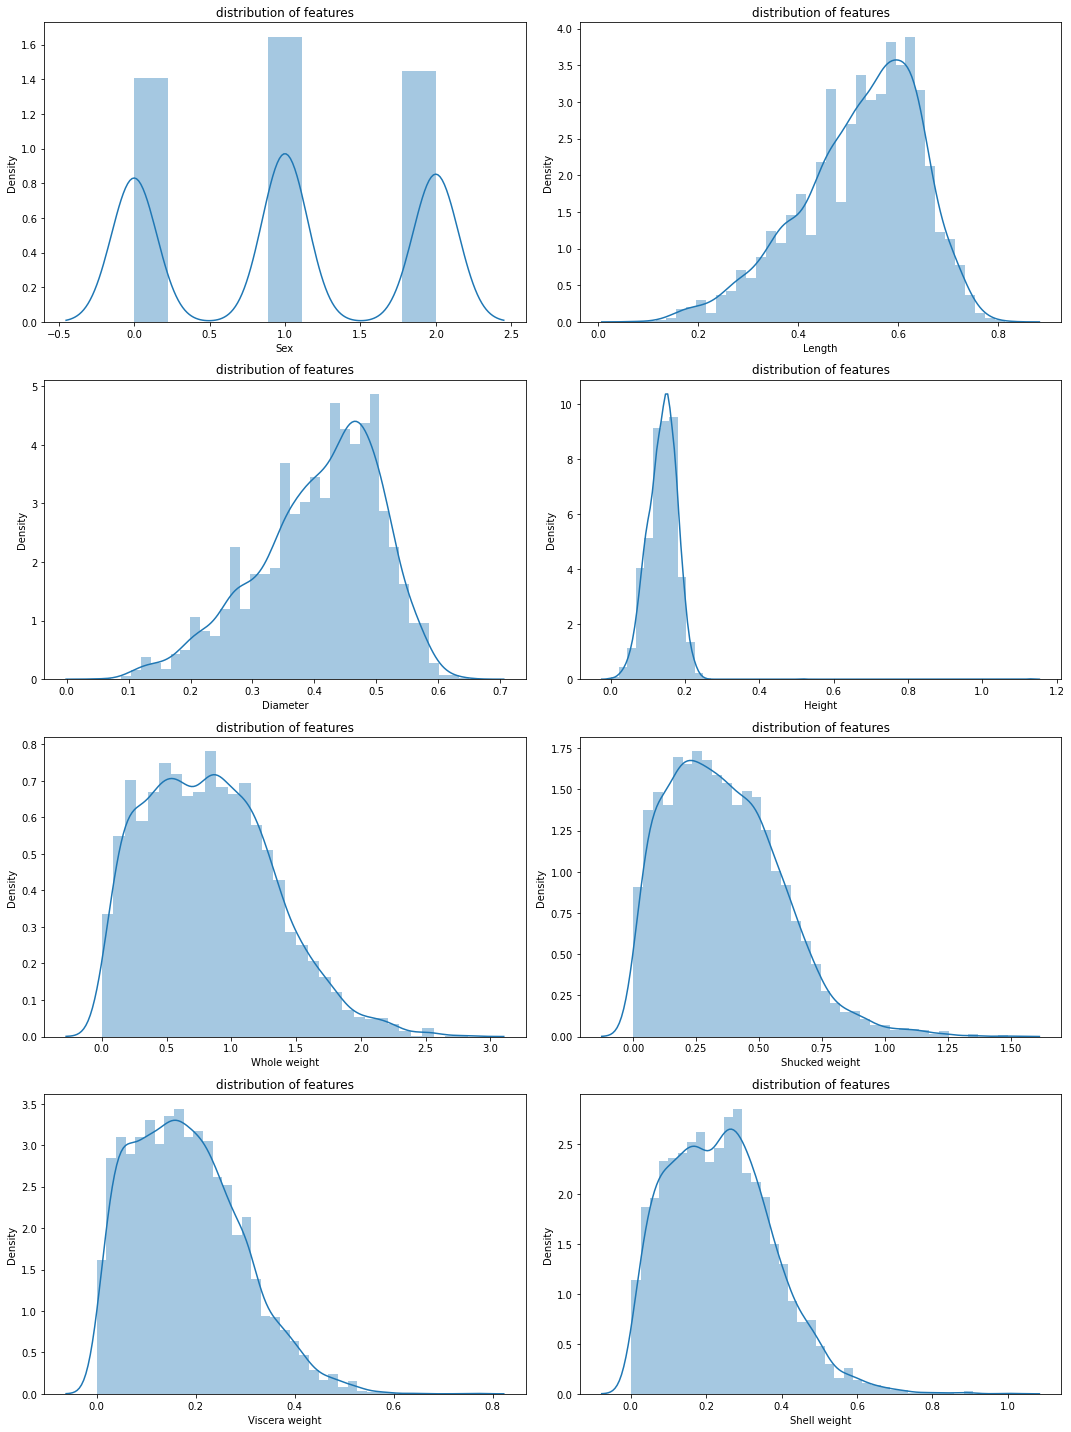

In [46]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in df:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.distplot(df[column])
        plt.title('distribution of features')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

array([[<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>],
       [<AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:ylabel='Density'>,
        <AxesSubplot:ylabel='Density'>, <AxesSubplot:y

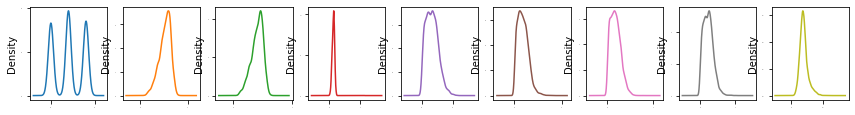

In [47]:
df.plot(kind='density',subplots=True,layout=(6,11),sharex=False,legend=False,fontsize=1,figsize=(18,12))

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-p

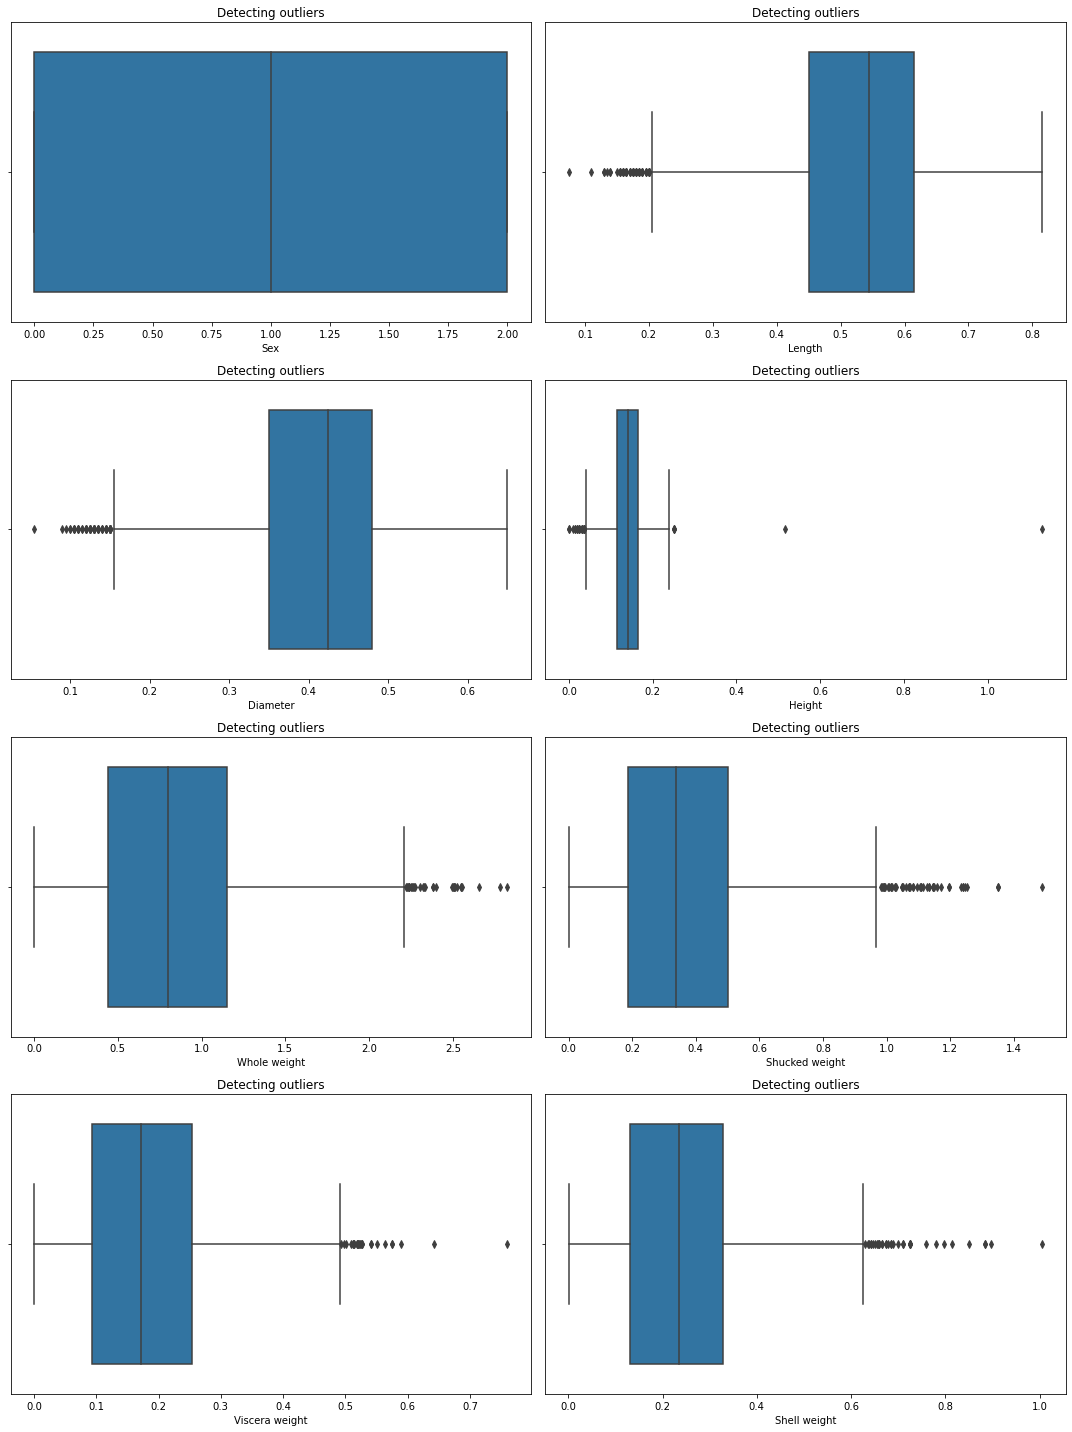

In [48]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in df:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.boxplot(df[column])
        plt.title('Detecting outliers')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

In [49]:
df.columns

Index(['Sex', 'Length', 'Diameter', 'Height', 'Whole weight', 'Shucked weight',
       'Viscera weight', 'Shell weight', 'Rings'],
      dtype='object')

In [50]:
df.skew().sort_values(ascending=False)

Height            3.128817
Rings             1.114102
Shucked weight    0.719098
Shell weight      0.620927
Viscera weight    0.591852
Whole weight      0.530959
Sex              -0.014980
Diameter         -0.609198
Length           -0.639873
dtype: float64

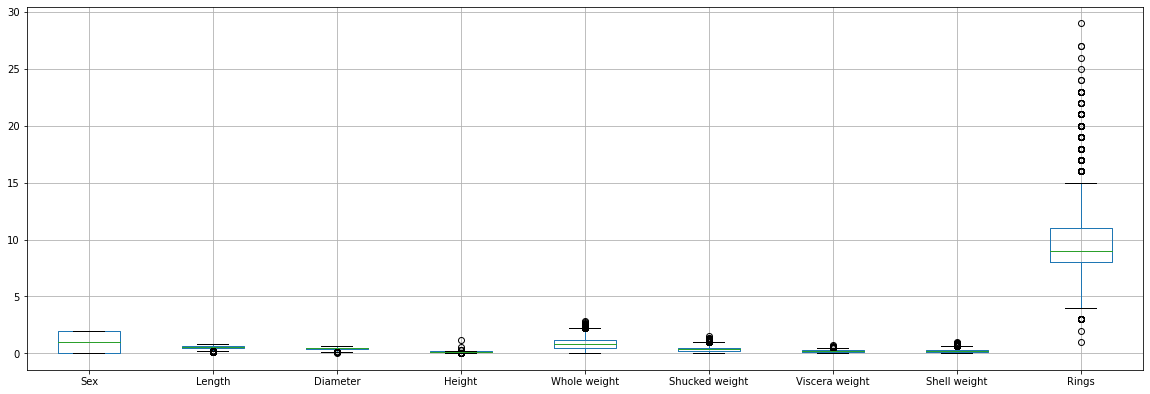

In [51]:
df.boxplot(figsize=[20,8])
plt.subplots_adjust(bottom=0.25)
plt.show()

In [52]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [53]:
df['Rings'].unique()

array([15,  7,  9, 10,  8, 20, 16, 19, 14, 11, 12, 18, 13,  5,  4,  6, 21,
       17, 22,  1,  3, 26, 23, 29,  2, 27, 25, 24], dtype=int64)

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-p

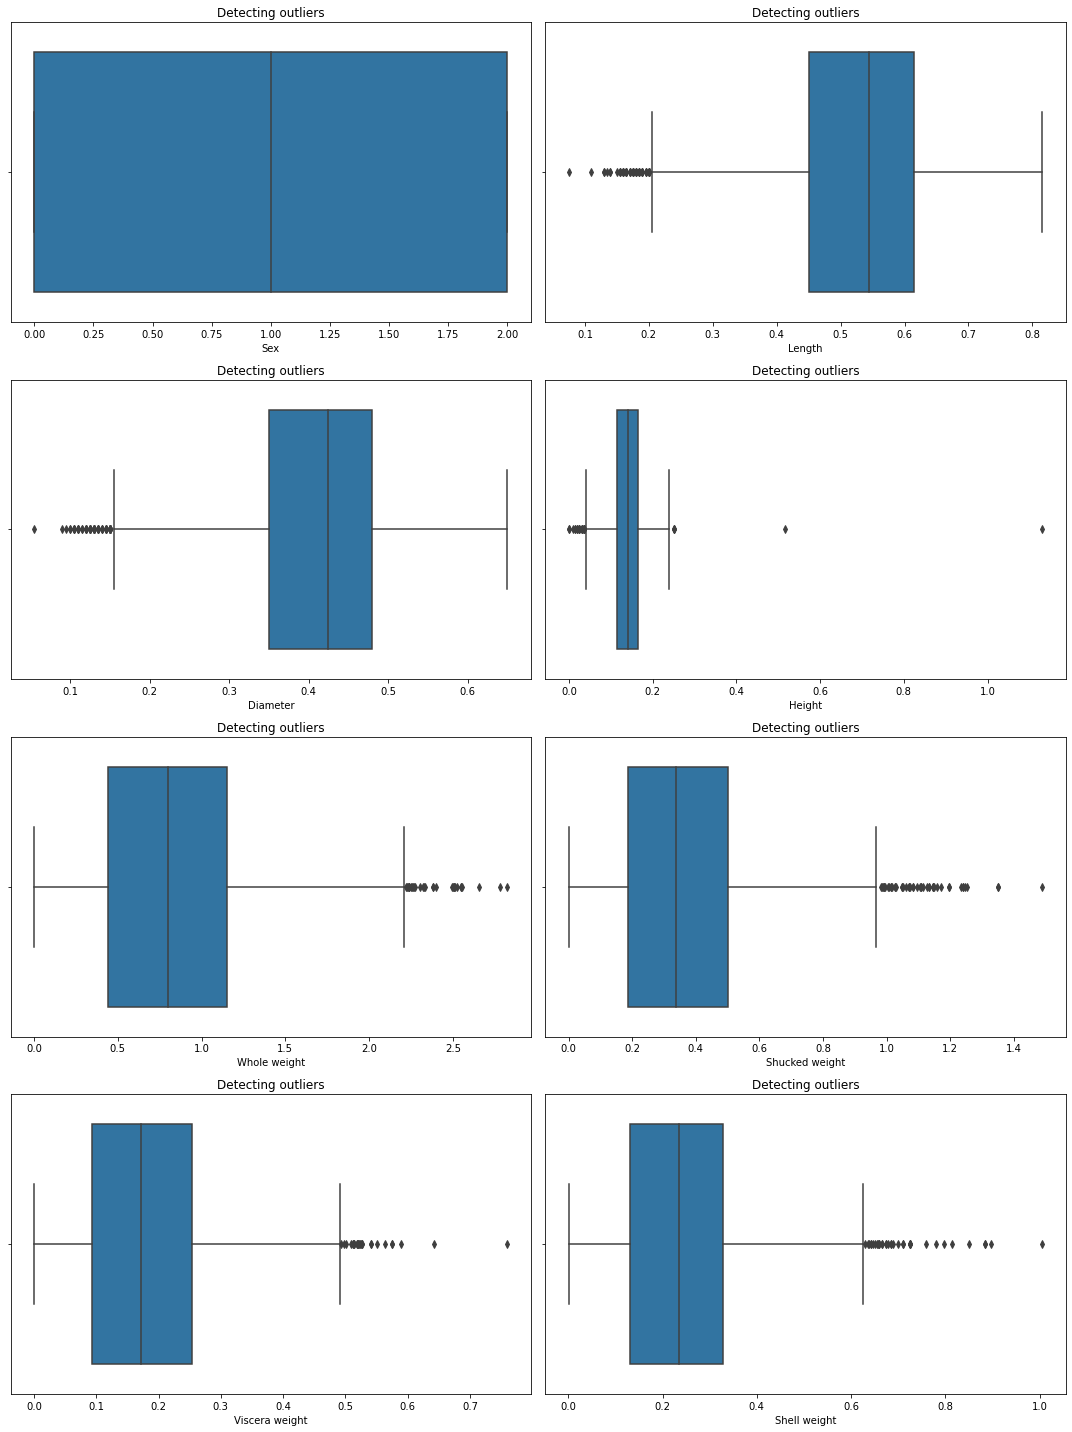

In [54]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in df:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.boxplot(df[column])
        plt.title('Detecting outliers')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

In [55]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [56]:
X = df.drop('Rings',axis=1)

In [63]:
np.abs(zscore(X))<3

NameError: name 'zscore' is not defined

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-p

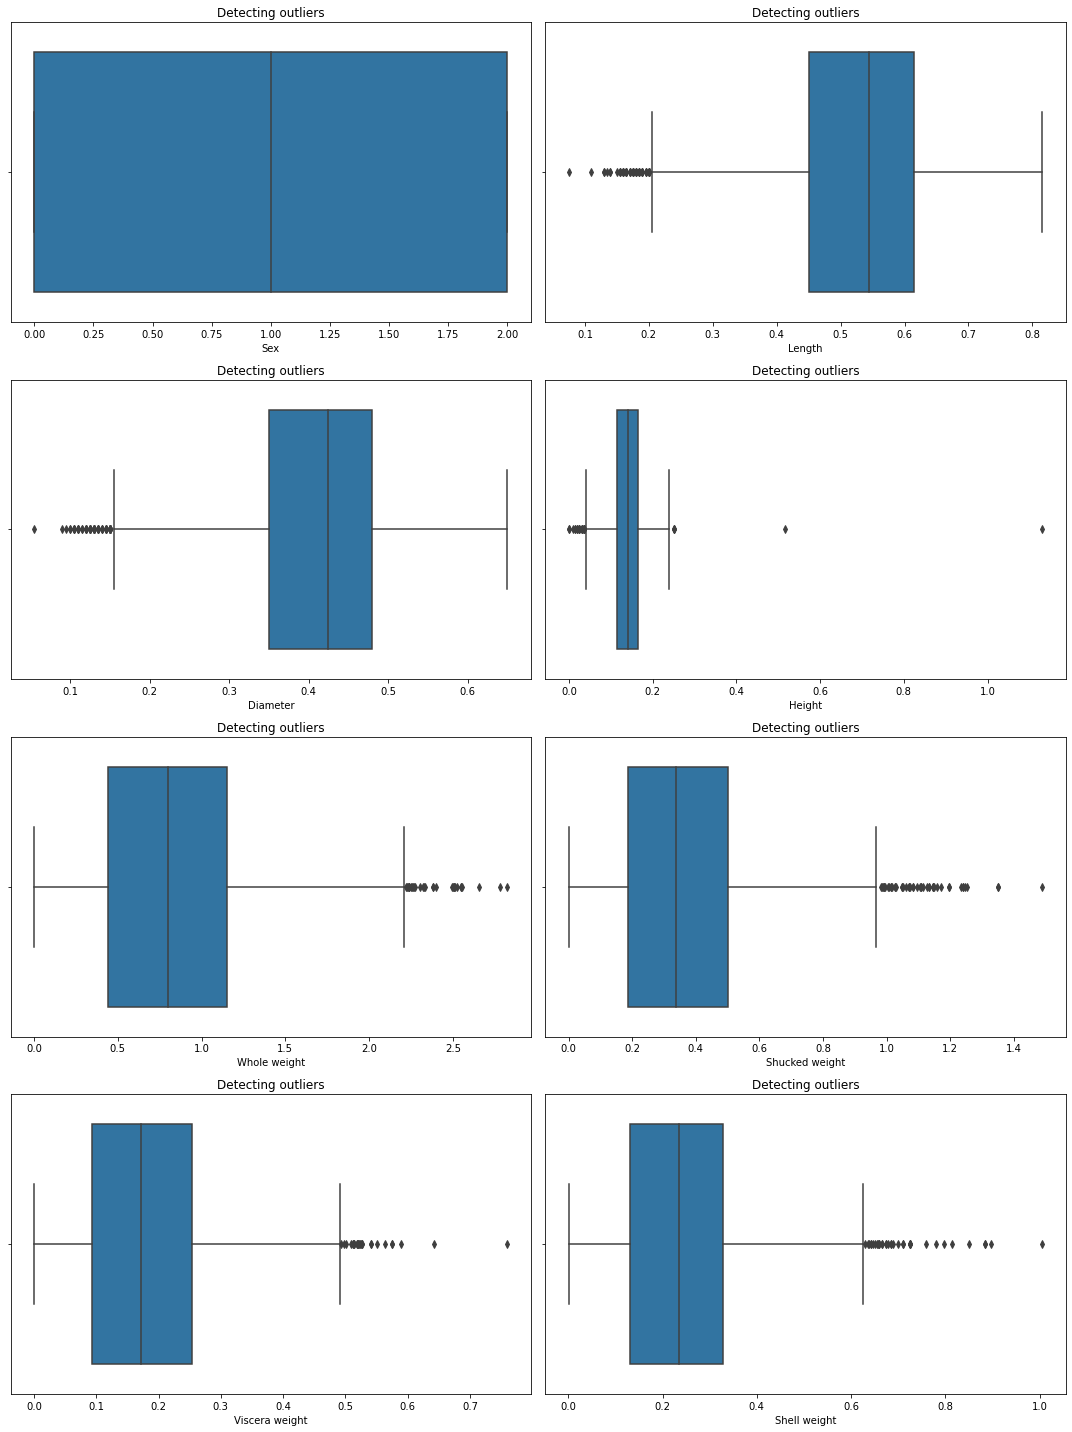

In [64]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in X:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.boxplot(X[column])
        plt.title('Detecting outliers')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

In [65]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [66]:
from scipy import stats

X = df.drop(['Sex','Rings'],axis=1)

z = np.abs(stats.zscore(X))
print(z)

        Length  Diameter    Height  Whole weight  Shucked weight  \
0     0.574558  0.432149  1.064424      0.641898        0.607685   
1     1.448986  1.439929  1.183978      1.230277        1.170910   
2     0.050033  0.122130  0.107991      0.309469        0.463500   
3     0.699476  0.432149  0.347099      0.637819        0.648238   
4     1.615544  1.540707  1.423087      1.272086        1.215968   
...        ...       ...       ...           ...             ...   
4172  0.341509  0.424464  0.609334      0.118813        0.047908   
4173  0.549706  0.323686  0.107991      0.279929        0.358808   
4174  0.632985  0.676409  1.565767      0.708212        0.748559   
4175  0.841182  0.777187  0.250672      0.541998        0.773341   
4176  1.549052  1.482634  1.326659      2.283681        2.640993   

      Viscera weight  Shell weight  
0           0.726212      0.638217  
1           1.205221      1.212987  
2           0.356690      0.207139  
3           0.607600      0.602294 

In [67]:
threshold = 3
print(np.where(z>3))

(array([  81,  129,  163,  164,  165,  165,  165,  166,  168,  170,  236,
        236,  236,  237,  237,  238,  238,  239,  277,  334,  358,  358,
        526,  526,  694,  696,  696,  719,  719,  720,  720,  891,  891,
        891, 1048, 1051, 1051, 1052, 1193, 1197, 1199, 1202, 1204, 1206,
       1206, 1207, 1207, 1207, 1207, 1209, 1209, 1257, 1417, 1417, 1418,
       1422, 1426, 1427, 1427, 1427, 1428, 1429, 1429, 1528, 1754, 1756,
       1757, 1759, 1761, 1762, 1762, 1762, 1763, 1763, 1763, 1821, 1982,
       1986, 1987, 1987, 2051, 2090, 2108, 2114, 2114, 2157, 2161, 2208,
       2274, 2334, 2334, 2368, 2381, 2544, 2623, 2624, 2624, 2624, 2625,
       2709, 2710, 2710, 2810, 2810, 2811, 2811, 2811, 2862, 2863, 2863,
       2863, 3007, 3008, 3148, 3149, 3151, 3188, 3427, 3427, 3427, 3599,
       3599, 3628, 3713, 3715, 3715, 3715, 3715, 3800, 3837, 3899, 3899,
       3902, 3961, 3962, 3996, 4145, 4148], dtype=int64), array([6, 6, 6, 6, 3, 4, 6, 6, 6, 5, 0, 1, 2, 0, 1, 0, 1, 0, 6, 6

In [68]:
df_new = df[(z<3).all(axis=1)]

In [69]:
df_new.shape

(4084, 9)

In [70]:
df.shape

(4177, 9)

# visiualisation to determine outliers,distribution and correlation between features and label

C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(
C:\Users\SONY\anaconda3\lib\site-p

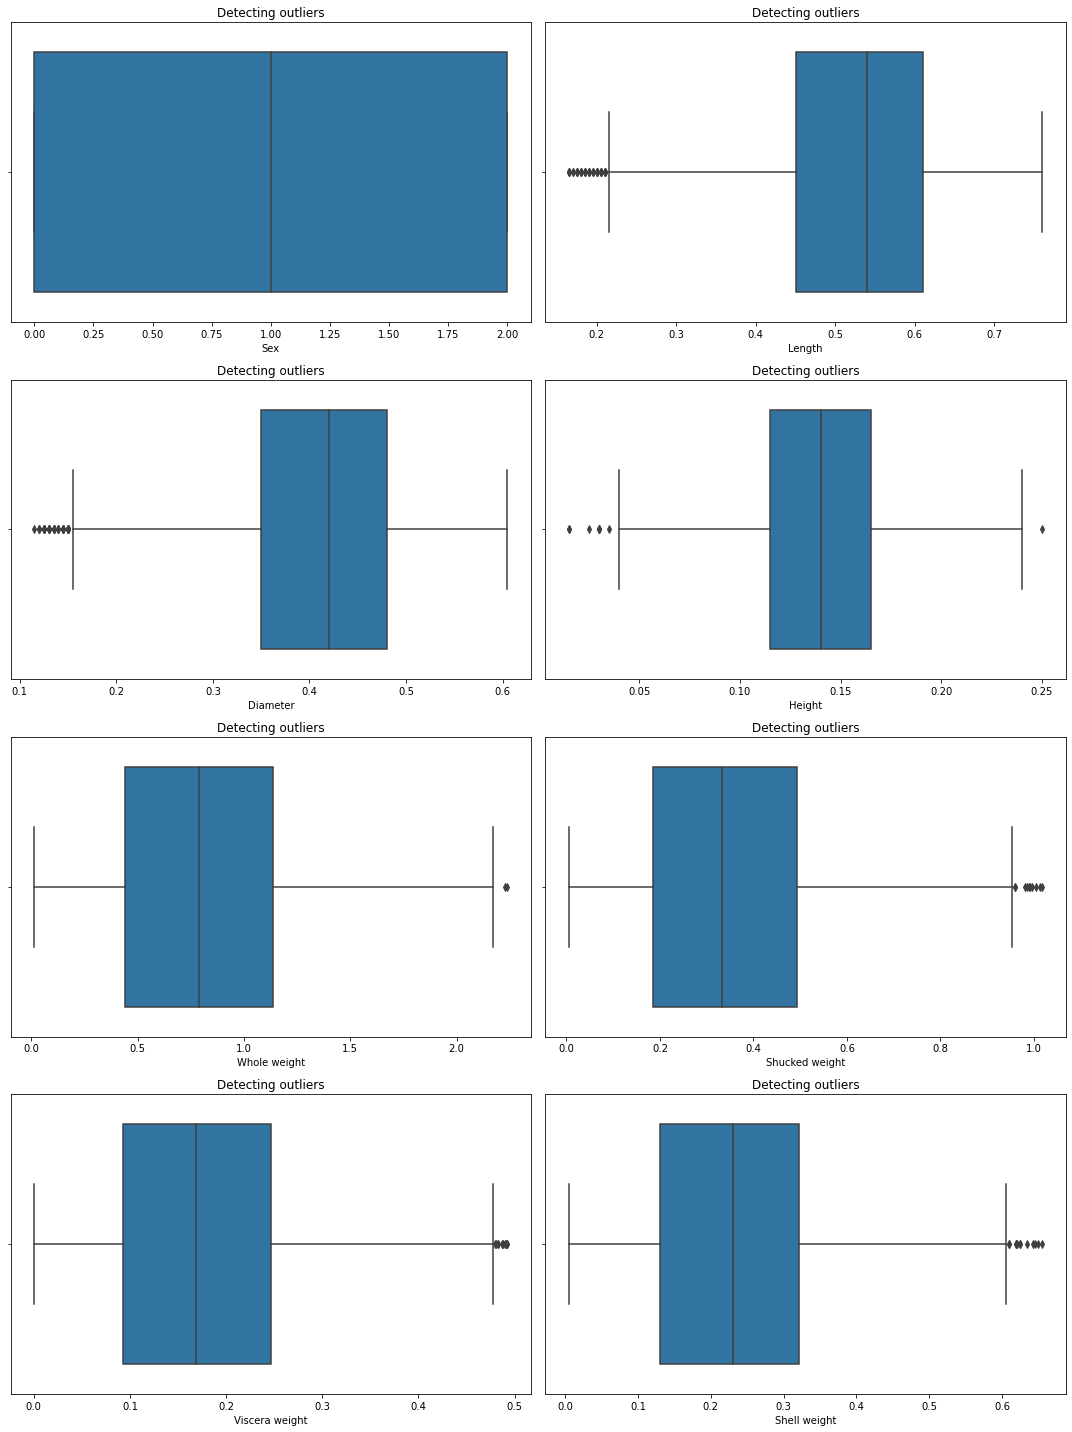

In [71]:
plt.figure(figsize=(15,20))
plotnumber = 1

for column in df_new:
    if plotnumber<=8:
        plt.subplot(4,2,plotnumber)
        sns.boxplot(df_new[column])
        plt.title('Detecting outliers')
        plt.xlabel(column)
    plotnumber+=1
    
plt.tight_layout()    

In [72]:
df_new.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [73]:
df_new.corr()['Rings'].sort_values(ascending=False)

Rings             1.000000
Shell weight      0.618991
Height            0.597622
Diameter          0.561048
Length            0.541905
Whole weight      0.533165
Viscera weight    0.497026
Shucked weight    0.413036
Sex              -0.396293
Name: Rings, dtype: float64

<AxesSubplot:>

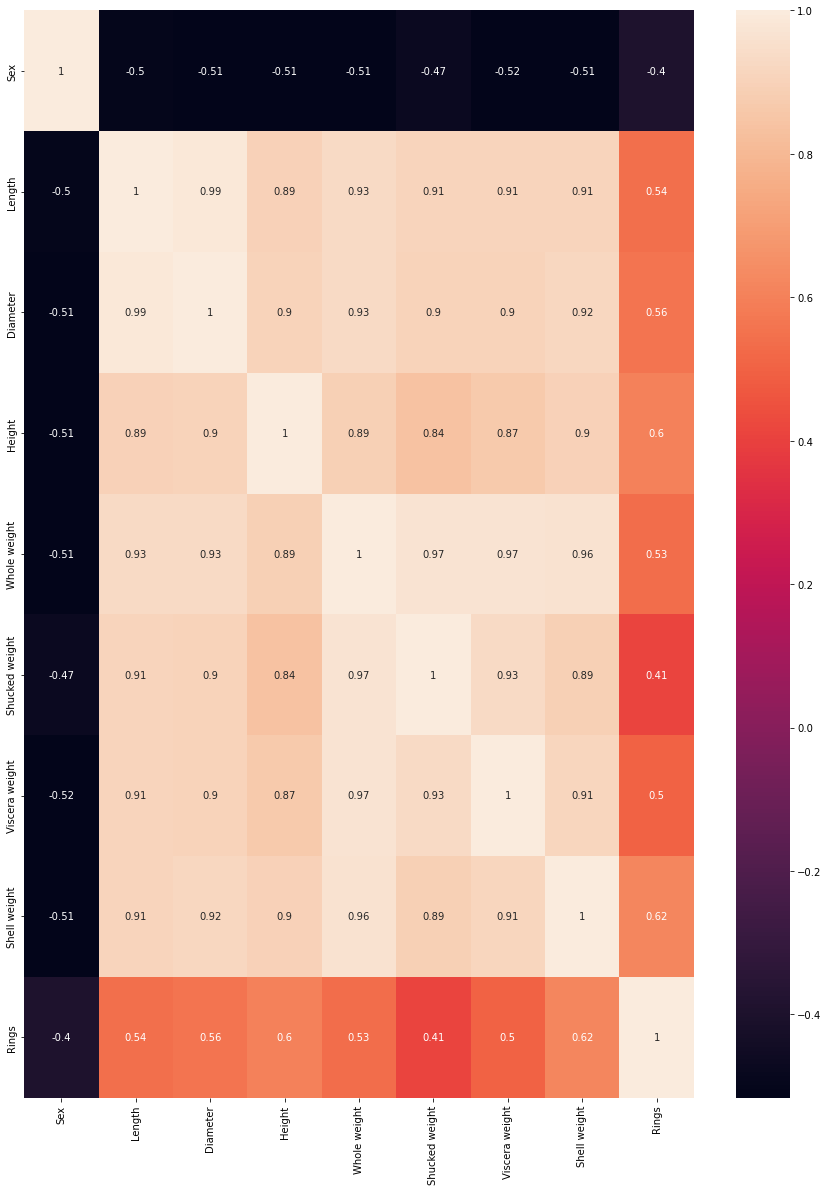

In [74]:
plt.figure(figsize=(15,20))
sns.heatmap(df_new.corr(),annot=True)

In [75]:
df_new.corr()['Length']

Sex              -0.501745
Length            1.000000
Diameter          0.985902
Height            0.894374
Whole weight      0.934127
Shucked weight    0.908711
Viscera weight    0.907570
Shell weight      0.911001
Rings             0.541905
Name: Length, dtype: float64

In [76]:
df_new.corr()['Diameter']

Sex              -0.514629
Length            0.985902
Diameter          1.000000
Height            0.901033
Whole weight      0.934226
Shucked weight    0.903699
Viscera weight    0.904090
Shell weight      0.918870
Rings             0.561048
Name: Diameter, dtype: float64

In [77]:
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


# building model...we chose random forest because it gave better performance

In [78]:
LR = LinearRegression()
rf = RandomForestRegressor()

In [79]:
x = df_new.drop('Rings',axis=1)
y = df_new['Rings']

In [80]:
scale = StandardScaler()
x_scaled = scale.fit_transform(x)

In [81]:
maxscore = 0
maxrs = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2,random_state=i)
    rf.fit(x_train,y_train)
    y_pred = rf.predict(x_test)
    acc = r2_score(y_test,y_pred)
    print('accuracy',acc,'random state',i)
    
    if acc > maxscore:
        maxscore=acc
        maxrs=i
        print('max accuracy',maxscore,'max random state',maxrs)

accuracy 0.5476337528292716 random state 1
max accuracy 0.5476337528292716 max random state 1
accuracy 0.4885419112287065 random state 2
accuracy 0.5391600271225555 random state 3
accuracy 0.5262426123294913 random state 4
accuracy 0.5158996251726065 random state 5
accuracy 0.5340482103977684 random state 6
accuracy 0.5320823388016683 random state 7
accuracy 0.5371618305508967 random state 8
accuracy 0.49145240587218186 random state 9
accuracy 0.5246100941341394 random state 10
accuracy 0.5608151421983429 random state 11
max accuracy 0.5608151421983429 max random state 11
accuracy 0.5167368192942723 random state 12
accuracy 0.5483516274875593 random state 13
accuracy 0.49208977878939797 random state 14
accuracy 0.5615204498209374 random state 15
max accuracy 0.5615204498209374 max random state 15
accuracy 0.497394858723997 random state 16
accuracy 0.5919798309911676 random state 17
max accuracy 0.5919798309911676 max random state 17
accuracy 0.49386992741133495 random state 18
accuracy

In [82]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.ensemble import AdaBoostRegressor,GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import train_test_split,cross_val_score
from sklearn.metrics import mean_absolute_error,mean_squared_error,r2_score

In [83]:
lr = LinearRegression()
dr = DecisionTreeRegressor()
rr = RandomForestRegressor()
svr = SVR()
ar = AdaBoostRegressor()
gr = GradientBoostingRegressor()
kn = KNeighborsRegressor()

In [84]:

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    lr.fit(x_train,y_train)
    pred_train = lr.predict(x_train)
    pred_test = lr.predict(x_test)
   
    print(f"At random state of {i}, the r2 score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state of {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print("\n")


    

At random state of 0, the r2 score is:- 0.5353672296630752
At random state of 0, the testing accuracy is:- 0.5105538407152787
At random state of 0, the mean absolute error is:- 1.5545987764480995
At random state of 0, the mean absolute error is:- 1.5545987764480995


At random state of 1, the r2 score is:- 0.5286404720519362
At random state of 1, the testing accuracy is:- 0.5354347100145349
At random state of 1, the mean absolute error is:- 1.5689623205123595
At random state of 1, the mean absolute error is:- 1.5689623205123595


At random state of 2, the r2 score is:- 0.5389914693806346
At random state of 2, the testing accuracy is:- 0.49727649111063355
At random state of 2, the mean absolute error is:- 1.6632775305256986
At random state of 2, the mean absolute error is:- 1.6632775305256986


At random state of 3, the r2 score is:- 0.5342278206678109
At random state of 3, the testing accuracy is:- 0.5161563142400631
At random state of 3, the mean absolute error is:- 1.635765872727245


In [ ]:

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    dr.fit(x_train,y_train)
    pred_train = dr.predict(x_train)
    pred_test = dr.predict(x_test)
   
    print(f"At random state of {i}, the r2 score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state of {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print("\n")


    

In [ ]:

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    rr.fit(x_train,y_train)
    pred_train = rr.predict(x_train)
    pred_test = rr.predict(x_test)
   
    print(f"At random state of {i}, the r2 score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state of {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print("\n")


    

In [ ]:

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    svr.fit(x_train,y_train)
    pred_train = svr.predict(x_train)
    pred_test = svr.predict(x_test)
   
    print(f"At random state of {i}, the r2 score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state of {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print("\n")


    

In [ ]:

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    ar.fit(x_train,y_train)
    pred_train = ar.predict(x_train)
    pred_test = ar.predict(x_test)
   
    print(f"At random state of {i}, the r2 score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state of {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print("\n")


    

# hyper parameter tuning..This didnt improve the performance

In [86]:
 from sklearn.model_selection import RandomizedSearchCV, train_test_split

In [88]:
rf = RandomForestRegressor()
number_of_iterations = 20
max_leaf_nodes = [2, 3, 4, 5, 6, 7]
min_samples_split = [5, 10, 20, 50]
max_depth = [5,10,15,20]
max_features = [3,4,5]
n_estimators = [50, 100, 200]

# Define the param distribution dictionary
param_distributions = dict(max_leaf_nodes=max_leaf_nodes, 
                           min_samples_split=min_samples_split, 
                           max_depth=max_depth,
                           max_features=max_features,
                           n_estimators=n_estimators)

# Build the gridsearch
grid = RandomizedSearchCV(estimator=rf, 
                          param_distributions=param_distributions, 
                          n_iter=number_of_iterations, 
                          cv = 5)

grid_results = grid.fit(x_train, y_train)

# Summarize the results in a readable format
print("Best params: {0}, using {1}".format(grid_results.cv_results_['mean_test_score'], grid_results.best_params_))
results_df = pd.DataFrame(grid_results.cv_results_)

Best params: [0.40084896 0.42805838 0.42684702 0.44261146 0.35621496 0.38917242
 0.41957609 0.40099977 0.37551932 0.41930481 0.42593243 0.35541229
 0.42110231 0.38256121 0.37240296 0.42368801 0.42015749 0.40082984
 0.30100599 0.39193363], using {'n_estimators': 200, 'min_samples_split': 50, 'max_leaf_nodes': 7, 'max_features': 5, 'max_depth': 15}


In [89]:
rf_hyp = RandomForestRegressor(n_estimators=200,min_samples_split=50,max_leaf_nodes=7,max_features=5,max_depth=15
)

In [90]:

for i in range(0,100):
    x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,test_size=0.2,random_state=i)
    rf_hyp.fit(x_train,y_train)
    pred_train = rf_hyp.predict(x_train)
    pred_test = rf_hyp.predict(x_test)
   
    print(f"At random state of {i}, the r2 score is:- {r2_score(y_train,pred_train)}")
    print(f"At random state of {i}, the testing accuracy is:- {r2_score(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print(f"At random state of {i}, the mean absolute error is:- {mean_absolute_error(y_test,pred_test)}")
    print("\n")


    

At random state of 0, the r2 score is:- 0.47788335135999105
At random state of 0, the testing accuracy is:- 0.4223751125637173
At random state of 0, the mean absolute error is:- 1.662565327969425
At random state of 0, the mean absolute error is:- 1.662565327969425


At random state of 1, the r2 score is:- 0.4717596149038099
At random state of 1, the testing accuracy is:- 0.4194360325886356
At random state of 1, the mean absolute error is:- 1.7384826736485155
At random state of 1, the mean absolute error is:- 1.7384826736485155


At random state of 2, the r2 score is:- 0.4803048653021432
At random state of 2, the testing accuracy is:- 0.4180937643913628
At random state of 2, the mean absolute error is:- 1.74261295593079
At random state of 2, the mean absolute error is:- 1.74261295593079


At random state of 3, the r2 score is:- 0.4717859915136189
At random state of 3, the testing accuracy is:- 0.443416002933268
At random state of 3, the mean absolute error is:- 1.759370286352392
At rand

In [91]:
import pickle

pickle.dump(rf,open('admin.pickle','wb'))

In [93]:
load_model = pickle.load(open('admin.pickle','rb'))
load_model.fit(x_train,y_train)
load_model.predict(x_test)

array([ 9.14,  9.96,  9.06, 11.89,  6.17,  9.87,  9.7 ,  7.93, 10.41,
        9.39,  9.94,  9.35,  9.65,  8.14, 10.04,  4.17, 11.78,  7.26,
        7.4 , 13.13,  8.42, 11.49, 11.58, 10.4 , 11.58, 13.28,  8.42,
        9.21,  9.8 ,  7.17,  8.11, 14.69, 10.36,  6.94,  9.88, 12.24,
       17.87,  5.19, 10.22, 12.28,  9.91, 12.64,  9.68,  8.5 ,  9.19,
        7.4 ,  8.95, 10.7 ,  9.33, 12.2 , 10.68,  9.71, 11.97, 10.55,
       13.17,  9.48, 11.55, 10.44,  7.19,  9.69,  9.91,  9.15, 10.43,
       10.71, 12.38, 14.87,  5.71, 11.43,  7.11,  8.78, 13.83,  7.12,
        9.86, 10.34, 12.84, 12.35,  9.22,  7.16,  7.81,  8.47,  5.39,
       11.33,  9.53,  9.97, 14.66, 16.74,  8.74,  5.98,  7.1 , 11.66,
        7.07,  7.16, 11.06,  9.99,  5.7 , 11.23,  7.81, 11.42,  8.66,
       12.1 , 12.68,  8.22,  8.4 , 10.65, 10.32, 10.73, 11.19, 10.03,
       12.11, 12.31, 11.29,  7.53, 10.71, 14.13,  9.69,  7.52, 12.12,
       10.23,  8.98, 11.88, 10.28, 13.85, 10.51,  8.93,  6.34, 13.24,
        9.64, 10.81,

In [94]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,1,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,1,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,0,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,1,0.440,0.365,0.125,0.5160,0.2155,0.1140,0.155,10
4,2,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7
